# Introduction to neural network classification with Tensorflow

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
X.shape, y.shape, X[0], y[0]

((1000, 2), (1000,), array([0.75424625, 0.23148074]), 1)

In [3]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})

In [4]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


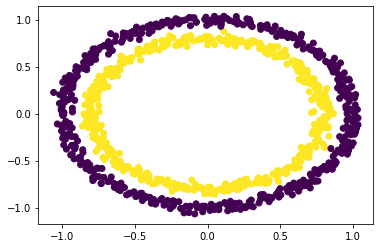

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y);
# This is your dataset. You need to classify it now.

### Steps in modelling:

1. Get data ready
2. Build and pick a model 
3. Fit the model 
4. Evaluate the model 
5. Experiment and improve

In [6]:
import tensorflow as tf

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer="sgd",
    metrics=["accuracy"]
)

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [7]:
# The accuracy is 0.5, so it's basically guessing

# Trying to get it better by increaing the number of layers

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1,)
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer="sgd",
    metrics=["accuracy"]
)

model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5000


[0.6945641040802002, 0.5]

### What ? Why is the accuracy still the same as if it's guessing 


Now trying to improving our model.


#### `Also, you shouldn't be evaluating your model on the data it was trained on. But let's ignore it for now`

In [8]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1,)
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

# WHAT ? Why is the model still guessing ? IT's still just at 50%

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189085006714, 0.5090000033378601]

In [9]:
# To visualise our model's prediction, let's create a function
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


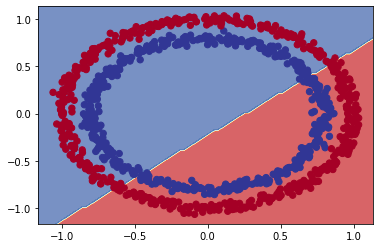

In [10]:
# checking out our plots decision boundary

plot_decision_boundary(model_3, X=X, y=y)


In [11]:
# Let's see if your model can be used for regression problems 
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1,)
])

model_4.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse"]
)

X_regr = tf.range(0, 1000, 5)
y_regr = tf.range(100, 1100, 5) # y = X + 100

X_reg_train = X_regr[:150]
X_reg_test = X_regr[150:]
y_reg_train = y_regr[:150]
y_reg_test = y_regr[150:]

model_4.fit(X_reg_train, y_reg_train, epochs=1000, verbose=0)

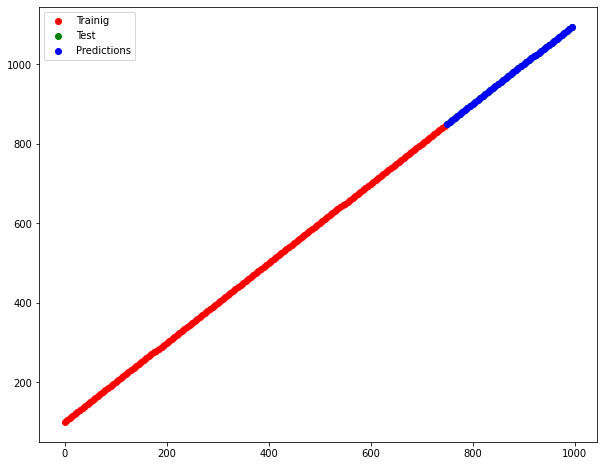

In [12]:
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10,8))
plt.scatter(X_reg_train, y_reg_train, c='r', label="Trainig")
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test')
plt.scatter(X_reg_test, y_reg_preds, c='b', label='Predictions')

plt.legend()

# Missing non-linearity

In [13]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, activation="linear")
])

model_5.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

history = model_5.fit(X, y, epochs=100, verbose=0)




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

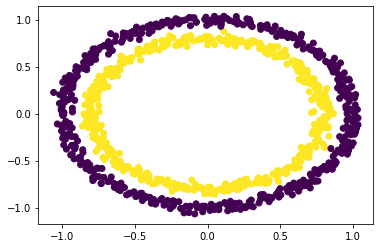

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y);

doing binary classifcation...


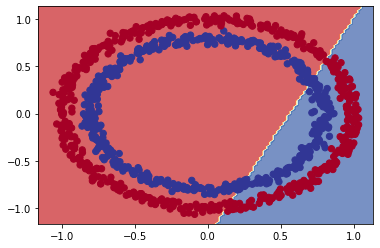

In [16]:
plot_decision_boundary(model=model_5, X=X, y=y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
doing binary classifcation...


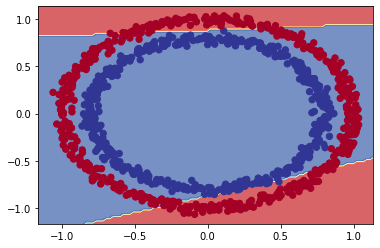

In [17]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1)
])

model_6.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_6.fit(X, y, epochs=250, verbose=0)

model_6.evaluate(X, y)

plot_decision_boundary(model=model_6, X=X, y=y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9920
doing binary classifcation...


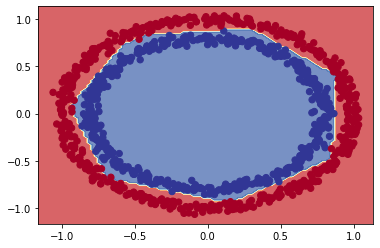

In [18]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_7.fit(X, y, epochs=250, verbose=0)

model_7.evaluate(X, y)

plot_decision_boundary(model=model_7, X=X, y=y)

## WHOA ! The accuracy sky rocketed 🚀  ! All we did was change the activation layer for the output layer. So check the activation functions depending on the task you are doing. 

For binary classification, you should be using a sigmoid activation function.

But depending on your problem, you should look it up and use the appropriate activation function.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_7.fit(X_train, y_train, epochs=250, verbose=0)

model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 1.0000


[0.01827358454465866, 1.0]

In [20]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history = model_8.fit(X_train, y_train, epochs=50, verbose=0)

model_8.evaluate(X_test, y_test)



7/7 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9900


[0.042313672602176666, 0.9900000095367432]

doing binary classifcation...
doing binary classifcation...


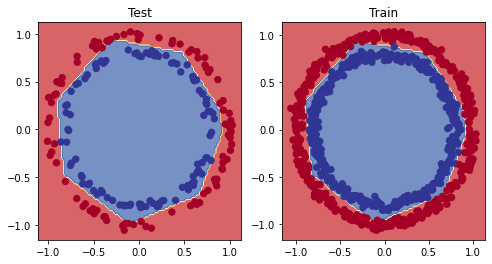

In [21]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.subplot(1, 2, 2)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)

In [22]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

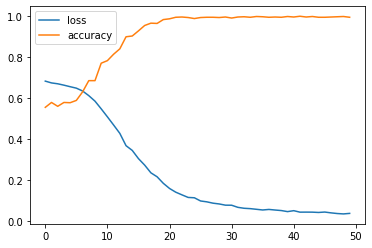

In [23]:
pd.DataFrame(history.history).plot()

### Finding the best learning rate

* A learning rate **callback**
* Another model
* A modified loss curve plot

In [24]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


# Create a learning rate call back

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

model_9.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5025
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5025
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5025
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5063
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5175
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5163
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5088
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5138
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5163
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5125
Epoch 11/

[1.0136542320251465, 0.5149999856948853]

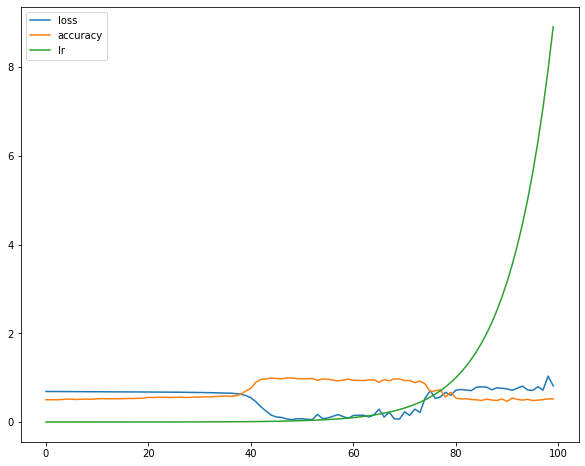

In [25]:
pd.DataFrame(history.history).plot(figsize=(10,8))

In [26]:
# plot the learning rate vs loss

lrs = 1e-4 * (10**(tf.range(100)/20))

In [27]:
len(lrs)

100

Text(0, 0.5, 'Loss')

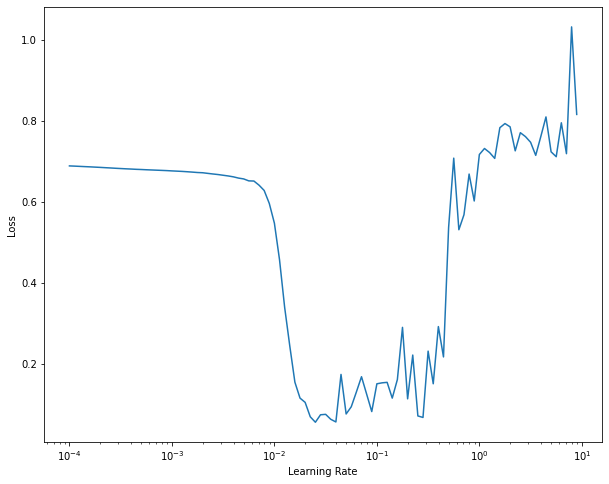

In [28]:
plt.figure(figsize=(10,8))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [29]:
# Choose the learning rate that corresponds to the lowest loss

learning_rate = 0.02 

In [30]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

history = model_10.fit(X_train, y_train, epochs=20)

model_10.evaluate(X_test, y_test)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6800 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6100
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.5850
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6562
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.7425
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7975
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.8413
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.9038
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.9413
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1850 - accuracy: 0.9875
Epoch 11/20
25/25 [

[0.03918218985199928, 0.9900000095367432]

### Evaluation Metrics 

* Accuracy 
* Precision
* Recall 
* F1 score
* Confusion Matrix 

In [31]:
from sklearn.metrics import confusion_matrix

y_preds = model_10(X_test)

In [32]:

confusion_matrix(y_test,tf.round(y_preds))

array([[ 96,   1],
       [  1, 102]])

In [73]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

# Multiclass classification model 

When we have more than 2 classes, it's called multiclass classification *italicized text*

In [35]:
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [36]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

10


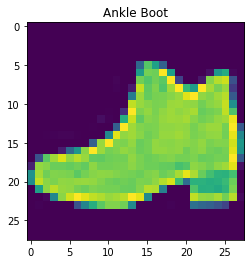

In [42]:
# Plot a single sample

import matplotlib.pyplot as plt

# Creating a small list to index the classes

class_names = ["Tshirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

print(len(class_names))

plt.imshow(train_data[15])
plt.title(class_names[train_label[15]]);

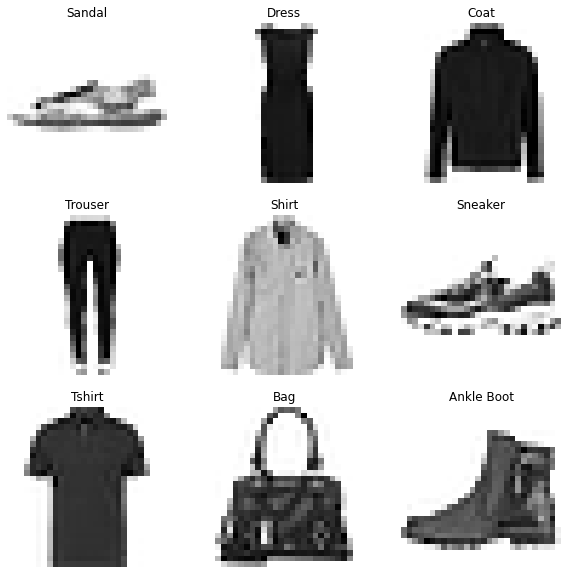

In [46]:
# Plot multiple random images

import random 

plt.figure(figsize=(10,10))

for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  rand_index = random.randint(0, len(train_data))
  plt.title(class_names[train_label[rand_index]])
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.axis(False)


### Building the multiclass classification model 

In [55]:
model_11 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(
                                 255, activation="relu"
                             ),
                             tf.keras.layers.Dense(
                                 128, activation="relu"
                             ),
                             tf.keras.layers.Dense(
                                 10, activation="softmax"
                             )
])


model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

non_norm_history = model_11.fit(
    train_data,
    train_label,
    epochs=25,
    validation_data=(test_data, test_label)
)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4058 - accuracy: 0.7592 - val_loss: 0.8523 - val_accuracy: 0.7544
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5795 - accuracy: 0.8105 - val_loss: 0.6271 - val_accuracy: 0.8057
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5240 - accuracy: 0.8229 - val_loss: 0.4945 - val_accuracy: 0.8273
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4734 - accuracy: 0.8362 - val_loss: 0.5422 - val_accuracy: 0.8266
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4367 - accuracy: 0.8456 - val_loss: 0.4827 - val_accuracy: 0.8241
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4116 - accuracy: 0.8518 - val_loss: 0.4963 - val_accuracy: 0.8227
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3911 - accuracy: 0.8611 - val_loss: 0.4397 - val_accuracy:

In [56]:
model_11.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 255)               200175    
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32768     
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total params: 234,233
Trainable params: 234,233
Non-trainable params: 0
_________________________________________________________________


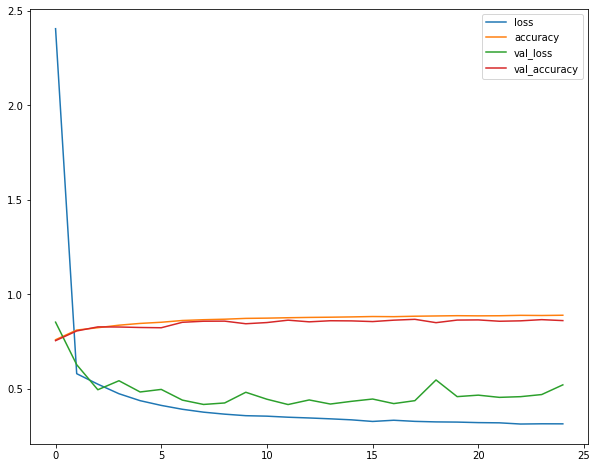

In [57]:
pd.DataFrame(non_norm_history.history).plot(figsize=(10,8))

In [58]:
# We haven't normalised our data. Let's train the model using normalised values

train_data_norm = train_data /255.0
test_data_norm = test_data / 255.0

In [59]:
model_12 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(
                                 255, activation="relu"
                             ),
                             tf.keras.layers.Dense(
                                 128, activation="relu"
                             ),
                             tf.keras.layers.Dense(
                                 10, activation="softmax"
                             )
])


model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

norm_history = model_12.fit(
    train_data_norm,
    train_label,
    epochs=25,
    validation_data=(test_data_norm, test_label)
)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4809 - accuracy: 0.8269 - val_loss: 0.4052 - val_accuracy: 0.8502
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3587 - accuracy: 0.8673 - val_loss: 0.4181 - val_accuracy: 0.8578
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3241 - accuracy: 0.8793 - val_loss: 0.3782 - val_accuracy: 0.8612
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3012 - accuracy: 0.8891 - val_loss: 0.3672 - val_accuracy: 0.8680
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2819 - accuracy: 0.8939 - val_loss: 0.3375 - val_accuracy: 0.8771
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.8987 - val_loss: 0.3691 - val_accuracy: 0.8612
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9034 - val_loss: 0.3643 - val_accuracy:

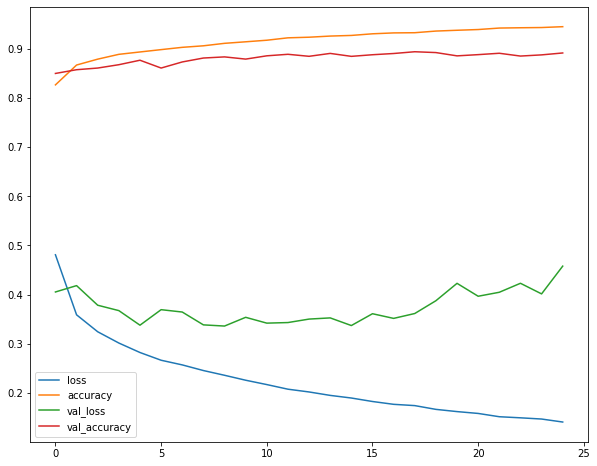

In [60]:
pd.DataFrame(norm_history.history).plot(figsize=(10,8))

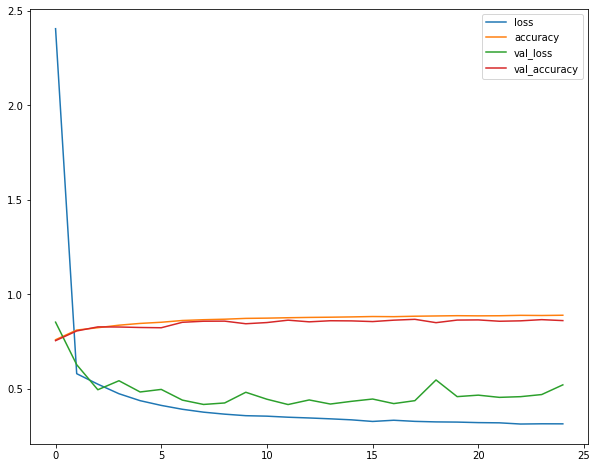

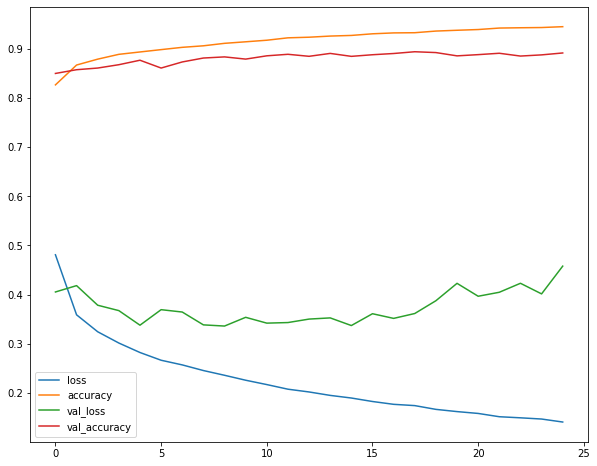

In [61]:
pd.DataFrame(non_norm_history.history).plot(figsize=(10,8))
pd.DataFrame(norm_history.history).plot(figsize=(10,8))

### Evaluating our model 

In [70]:
y_probs = model_12.predict(test_data_norm)
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

y_predictions = y_probs.argmax(axis=1)

y_predictions

array([9, 2, 1, ..., 8, 1, 5])

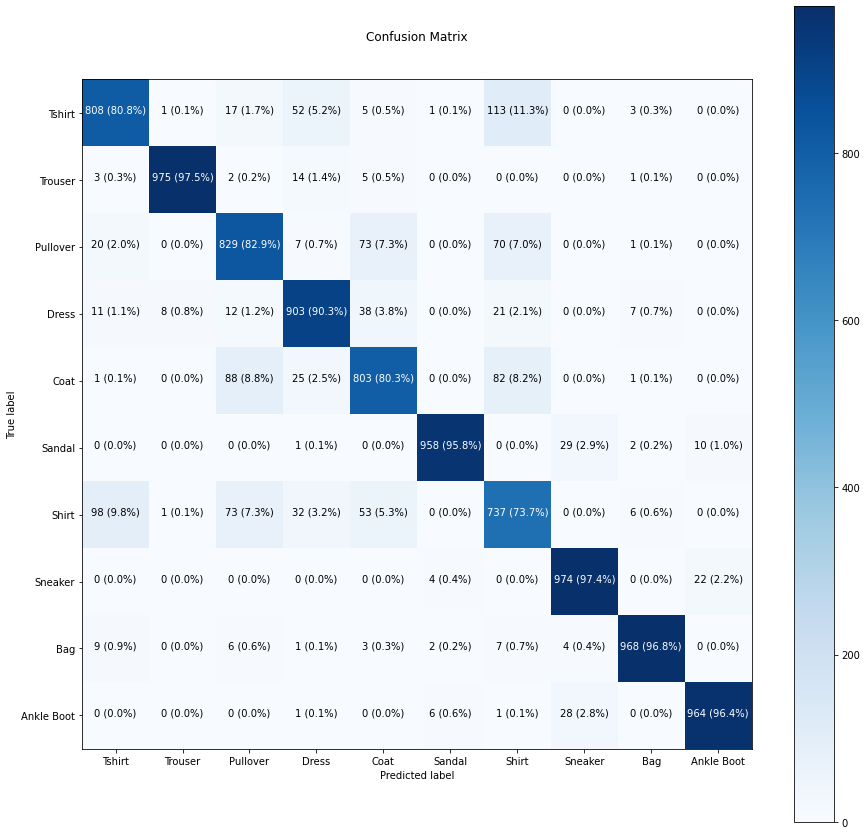

In [76]:
make_confusion_matrix(y_true=test_label, 
                      y_pred=y_predictions,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)